# Example: running an alpha-carbon RMSD calculation on Google-Cloud hosted membrane protein trajectory

Prerequisites:

- Create a python environment with `zarrtraj` installed (see [installation](https://zarrtraj.readthedocs.io/en/latest/installation.html#installation))
- Install `ipykernel` to be able to run jupyter notebooks
- Install `matplotlib` for plotting

MD Trajectory is the [YiiP 90ns trajectory from MDAnalysisData](https://www.mdanalysis.org/MDAnalysisData/yiip_equilibrium.html)


## 1. Use `fsspec` to load the topology file into memory


In [1]:
import fsspec
from io import StringIO

with fsspec.open("gcs://zarrtraj-test-data/YiiP_system.pdb", "r") as f:
    yiip_topology = StringIO(f.read())

## 2. Instantiate an MDAnalysis `Universe` using the in-memory topology file and Google Cloud bucket trajectory URL


In [2]:
import zarrtraj
import MDAnalysis as mda

u = mda.Universe(
    yiip_topology, "gcs://zarrtraj-test-data/yiip.zarrmd", topology_format="PDB"
)

/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element Z found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)
/Users/lwoods/miniconda3/envs/zarrtraj-prod/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)
/Users/lwoods/miniconda3/envs/zarrtraj-p

## 3. Calculate the RMSD of the alpha carbons in the trajectory


In [3]:
from MDAnalysis.analysis import rms


calpha_traj = u.atoms.select_atoms("name CA")

rmsd_analysis = rms.RMSD(
    calpha_traj,
    calpha_traj,
    # reference frame to perform RMSD against across the trajectory
    ref_frame=0,
).run(step=100)

frame, time, rmsd = rmsd_analysis.results.rmsd.T

## 4. Plot the RMSD of the trajectory over time


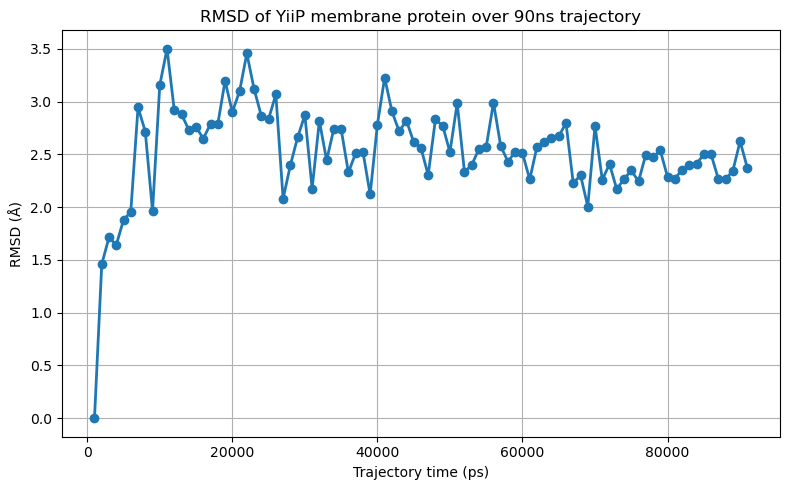

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(time, rmsd, marker="o", linestyle="-", linewidth=2)

plt.xlabel("Trajectory time (ps)")
plt.ylabel("RMSD (Å)")
plt.title("RMSD of YiiP membrane protein over 90ns trajectory")
plt.grid(True)
plt.tight_layout()

plt.show()